In [21]:
import pandas as pd
import numpy as np
import matplotlib as mtl
import seaborn as sb

In [2]:
reviews = pd.read_csv("./Reviews.csv")
r_ex = reviews.drop_duplicates()
print(len(reviews)/len(r_ex))

1.0


In [4]:
landslide = pd.read_csv("./landslide_catalog.csv")
landslide.sample()


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
357,1920,5/30/10,NaN,NaN,Guatemala,GT,Sololá,1422,Santa Cruz La Laguna,6.00513,...,"(14.691800000000001, -91.116799999999998)",Landslide,Mudslide,Medium,Tropical cyclone,Tropical Cyclone Agatha,NaN,14.0,Mayan Trip,http://mayantrip.com/lake-atitlan-guatemala-ag...


In [5]:
volcano = pd.read_csv("./volcano_database.csv")
volcano.sample()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
932,312053,Stepovak Bay 4,United States,Alaska,Stratovolcano,Evidence Credible,Unknown,55.954,-159.954,1557,No Data,Subduction Zone / Continental Crust (>25 km)


In [6]:
earthquake = pd.read_csv("./earthquake_database.csv")
earthquake.sample()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
7291,11/23/1984,04:45:53,-7.993,102.255,Earthquake,33.0,NaN,NaN,6.4,MW,...,NaN,NaN,NaN,NaN,1.2,USP00029B1,US,US,NC,Reviewed


In [18]:
earthquake['Date_parsed'] = pd.to_datetime(earthquake['Date'],infer_datetime_format=True,utc=True)

In [19]:
# earthquake['Date_parsed'] = date_parsed
earthquake['Date_parsed']

0       1965-01-02 00:00:00+00:00
1       1965-01-04 00:00:00+00:00
2       1965-01-05 00:00:00+00:00
3       1965-01-08 00:00:00+00:00
4       1965-01-09 00:00:00+00:00
                   ...           
23407   2016-12-28 00:00:00+00:00
23408   2016-12-28 00:00:00+00:00
23409   2016-12-28 00:00:00+00:00
23410   2016-12-29 00:00:00+00:00
23411   2016-12-30 00:00:00+00:00
Name: Date_parsed, Length: 23412, dtype: datetime64[ns, UTC]

C:\ProgramData\Anaconda3\envs\qiskitdemo\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Date_parsed'>

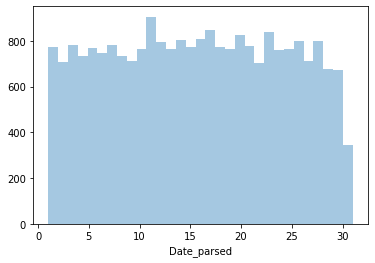

In [22]:
dy = earthquake['Date_parsed'].dt.day
sb.distplot(dy,kde=False,bins=31)



# Character Encoding

In [23]:
before = "This is the yuan symbol: ￥"
after = before.encode("ascii",errors="replace")

In [24]:
print(after.decode("ascii"))

This is the yuan symbol: ?


In [25]:
import chardet

In [29]:
re = chardet.detect(bytearray(before,encoding='utf-8'))
print(re)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [33]:
with open ("./ks-projects-201612.csv",'rb') as f:
    result = chardet.detect(f.read(10000))

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [34]:
with open ("././PoliceKillingsUS.csv",'rb') as f:
    result = chardet.detect(f.read(10000))

print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


# Duplication

In [38]:
reviews = pd.read_csv("./Reviews.csv")
r_sorted = reviews.sort_values(by='ProductId',ascending=True)
r_sorted.drop_duplicates(subset=['ProductId','UserId','ProfileName','Time'],inplace=True)
print(len(r_sorted)/len(reviews))

0.9926326492557005
